## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

**ANSWER:** There are 294,478 rows in the dataset

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

**ANSWER:** There are 290,584 unique users in the dataset.

d. The proportion of users converted.

In [5]:
df[df['converted']==1].shape[0]/df['user_id'].nunique()

0.12126269856564711

**ANSWER:** Assuming this is counted using only the unique users then 12.12% of unique users where converted.

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[(df.landing_page == 'new_page') & (df.group != 'treatment')].shape[0] + df[(df.landing_page != 'new_page') & (df.group == 'treatment')].shape[0]

3893

**ANSWER:** 'new_page' and 'treatment' don't match 3893 times.

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**ANSWER:**  No missing rows as number of rows matches for all entries.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Creating dataframe for rows to be dropped.
droprows = df[(df.landing_page == 'new_page') & (df.group != 'treatment')]
droprows2 = df[(df.landing_page != 'new_page') & (df.group == 'treatment')]
droprows = droprows.append(droprows2) 

# Dropping the rows from df and storing in df2.
df2=df.drop(droprows.index, axis=0)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

**ANSWER:** There are 290,584 unique user ids.

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Getting the index and the user_id for the duplicated row.
df2[df2['user_id'].duplicated()].user_id


2893    773192
Name: user_id, dtype: int64

**ANSWER**: Row in index 2893 is duplicated. The user_id corresponding to this index is 773192.

c. What is the row information for the repeat **user_id**? 

In [12]:
# Getting the row of the two repeated user_ids. 
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**ANSWER**: Shown above are the two rows with the same user_id. Note that the second one is considered to be the duplicated one.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Creating varible with row to be dropped
droprow = df2[df2['user_id'].duplicated()]

#Dropping row from df2
df2 = df2.drop(droprow.index)

In [14]:
#Checking if any duplicates exist

df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

**ANSWER**: 11.96% of individuals were converted regardless of landing page received.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2[df2.group == 'control']['converted'].mean()

0.1203863045004612

**ANSWER**: 12.04% of individuals in the control group were converted.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2[df2.group == 'treatment']['converted'].mean()

0.11880806551510564

**ANSWER**: 11.88% of individuals in the treatment group were converted.

d. What is the probability that an individual received the new page?

In [18]:
df2[df2.landing_page == 'new_page'].shape[0]/df2.shape[0]

0.5000619442226688

**ANSWER**: 50% of individuals received the new page.

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**ANSWER**: At a glance, it appears that the new page performs worse than the old page. However, it is possible that due to change aversion bias. It might be good at assess the performance of the new page some time after first introduced to see if the performance increases.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0 -> pnew-pold <= 0**

**H1 -> pnew-pold > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [19]:
# Separate df2 into df2old and df2new

df2old = df2[df2.landing_page == 'old_page']
df2new = df2[df2.landing_page == 'new_page']

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
pnew=df2['converted'].mean()
pnew

0.11959708724499628

**ANSWER:** If **pnew** and **pold** are the same, then **pnew** should equal 11.96% similar to the overall conversion rate for the whole data set.

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
pold=df2['converted'].mean()
pold

0.11959708724499628

**ANSWER:** If **pnew** and **pold** are the same, then **pold** should equal 11.96% similar to the overall conversion rate for the whole data set.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
nnew=df2[df2.landing_page == 'new_page'].shape[0]
nnew

145310

**ANSWER:**  145,310 individuals in the treatment group.

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
nold=df2[df2.landing_page == 'old_page'].shape[0]
nold

145274

**ANSWER:** 145,274 individuals in the control group.

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0,1],size=nnew,p=[(1-pnew),pnew])
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0,1],size=nold,p=[(1-pold),pold])
old_page_converted

array([0, 0, 0, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
pnewsim=new_page_converted.mean()
poldsim=old_page_converted.mean()
pnewsim-poldsim

-0.00080740482181797246

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

p_diffs = []

for i in range(2000):
    new_page_converted = np.random.choice([1,0],size=nnew,p=[pnew,(1-pnew)])
    old_page_converted = np.random.choice([1,0],size=nold,p=[pold,(1-pold)])
    pnew=new_page_converted.mean()
    pold=old_page_converted.mean()
    p_diffs.append(pnew-pold)

In [27]:
p_diffs = []
new_convert = np.random.binomial(nnew,pnew,10000)/nnew
old_convert = np.random.binomial(nold,pold,10000)/nold
p_diffs = new_convert - old_convert
p_diffs

array([ -7.52542818e-04,  -2.68643844e-03,   1.30545954e-03, ...,
         9.26990805e-04,  -1.77762131e-03,   8.04512985e-05])

In [28]:
np.random.binomial(2,0.5,4)

array([1, 2, 0, 0])

In [29]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

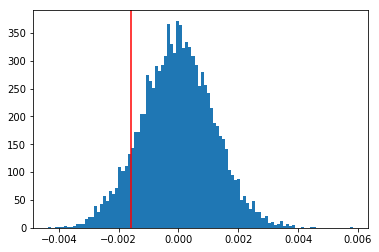

In [30]:
obs_diff=df2[(df2.landing_page=='new_page')&(df2.converted==1)].shape[0]/df2[(df2.landing_page=='new_page')].shape[0]-df2[(df2.landing_page=='old_page')&(df2.converted==1)].shape[0]/df2[(df2.landing_page=='old_page')].shape[0]

plt.hist(p_diffs,bins=100)
plt.axvline(x = obs_diff, c ='r');

**ANSWER:** Expected normal shape is achieved. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
obs_diff=df2[(df2.landing_page=='new_page')&(df2.converted==1)].shape[0]/df2[(df2.landing_page=='new_page')].shape[0]-df2[(df2.landing_page=='old_page')&(df2.converted==1)].shape[0]/df2[(df2.landing_page=='old_page')].shape[0]
(p_diffs > obs_diff).mean()

0.90249999999999997

**ANSWER**: 

From the sampling distribution set, around 90.6% (might slightly vary depending on when this was run) was above the sample **obs_diff**.

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**ANSWER:** The p-value was calculated. Since the observed mean from df2 was -0.00157, we are looking to do a single-tailed test to determine the p-value. This would mean seeing how much of the sampling distribution proportion is bigger than the observed mean acquired from df2. 

The sampling distribution indicates that the null p_diff mean is very close to 0 and the p-value is 0.906 (higher than the 0.05 alpha threshold), it appears that the null hypothesis remains as there is no evidence to reject the null hypothesis. As such, it would be recommended that the old website landing page is kept as is.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2[(df2.landing_page == 'old_page')&(df2.converted == 1)].shape[0]
convert_new = df2[(df2.landing_page == 'new_page')&(df2.converted == 1)].shape[0]
n_old = df2[(df2.landing_page == 'old_page')].shape[0]
n_new = df2[(df2.landing_page == 'new_page')].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
#Getting Z-Score and P-Value from Z-Testing

zscore, pvalue=sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')

In [34]:
zscore, pvalue

(-1.3109241984234394, 0.90505831275902449)

In [35]:
# Critical Z Score for 95% CI to compare with ZScore above.
from scipy.stats import norm
norm.ppf(1-(0.05))

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**ANSWER:** Since the z-score is within (less than) the critical z-score value (for 95% confidence interval to match the Type I 5% rate) and pvalue is >0.05, we fail to reject the null hypothesis once again. This is consistent with our previous result.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**ANSWER:** Logistic regresion as we are looking to predict a binary response.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# Creating extra columns
df2['intercept']=1
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
#Instantiating
lm = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
#Fitting
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
#Summary
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-27 01:04 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**ANSWER:** The p-value is 0.1899. The p-value differs as the hypothesis here is looking at whether a user has converted or not, which is a double-tailed test instead of the single-tailed test we had earlier in Part II. If we subtracted half 0.1899 from 1, we would get our one-sided p-value. Below, an approximate number was calculated using this explanation.

0.18229999999999999

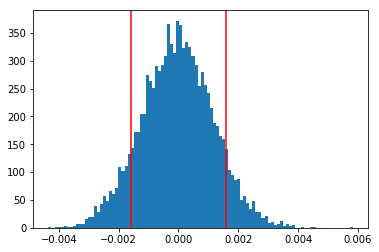

In [39]:
plt.hist(p_diffs,bins=100)
plt.axvline(x = obs_diff, c ='r');
plt.axvline(x = abs(obs_diff), c ='r');
((p_diffs < obs_diff)|(p_diffs>0.0016)).mean()

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**ANSWER:** The current model is oversimplified. It might help to predict if other factors are involved such as gender, user location, etc. However, this will make our model stray away from the original model used in Part II.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
df3 = pd.read_csv('countries.csv')
df3['country'] = df3['country'].astype(str)
df3['user_id'] = df3['user_id'].astype(int)
df4=df2.merge(df3, left_on=df2['user_id'], right_on=df3['user_id'])
df4.head()

,key_0,user_id_x,timestamp,group,landing_page,converted,intercept,ab_page,user_id_y,country
0,851104,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,851104,US
1,804228,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,804228,US
2,661590,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,661590,US
3,853541,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,853541,US
4,864975,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,864975,US


In [41]:
df4[['ca','uk','us']]=pd.get_dummies(df4['country'])
lm = sm.Logit(df4['converted'], df4[['intercept','ab_page','ca','uk']])
result = lm.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-27 01:04 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
ca           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
uk            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

**ANSWER:** It appears users in different countries convert at a different rates. However, the p-value is above the set alpha of 0.05, which would indicate that this is not significant and the null hypothesis is not rejected similar to previous conclusions.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
df4['ab_page_ca'] = df4['ab_page']*df4['ca'] 
df4['ab_page_uk'] = df4['ab_page']*df4['uk']

df4[['ca','uk','us']]=pd.get_dummies(df4['country'])
lm = sm.Logit(df4['converted'], df4[['intercept','ab_page','ca','uk', 'ab_page_ca', 'ab_page_uk']])
result = lm.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


**ANSWER:** It appears users in different countries convert at a different rates. However, the p-value is above the set alpha of 0.05, which would indicate that this is not significant and the null hypothesis is not rejected similar to previous conclusions.

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])